In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


## 데이터 불러오기

In [5]:
import pandas as pd
df=pd.read_csv('auto.csv')

In [34]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,1,0,0


## 독립/종속 변수 나누기


In [36]:
# 데이터 프레임에서 특정열을 제거하고, 제거된 열은 리턴
# y 변수를 분리하기 위해
y = df.pop('mpg')

KeyError: ignored

In [37]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [38]:
X = df

In [39]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,1,0,0


## Categorical Feature 처리하기

In [33]:
import seaborn as sns
df['origin'].unique()

KeyError: ignored

In [11]:
origin = df.pop('origin')

In [12]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70
3,8,304.0,150.0,3433.0,12.0,70
4,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82
388,4,97.0,52.0,2130.0,24.6,82
389,4,135.0,84.0,2295.0,11.6,82
390,4,120.0,79.0,2625.0,18.6,82


## 전처리 : Categorical variable을 Dummy Variable로 바꾸

In [40]:
# column : 카테고리컬 변수에 해당하는 열
# prefix : 새로 생성될 열에서 시작하는 문자열 지정
pd.get_dummies(X, columns = ['origin'], prefix= 'origin')

KeyError: ignored

In [46]:
##데이터 셋 표준화
import numpy as np
X_std = (X-X.mean())/X.std()
y = np.array(y)

## 딥러닝 회귀모형 만들기

In [48]:
X.shape

(392, 9)

In [51]:
model = keras.Sequential([
                          layers.Dense(16, input_shape = [X.shape[1]], activation = 'relu'),
                          layers.Dense(16, activation = 'relu'),
                          layers.Dense(1)

])
optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',optimizer=optimizer, metrics=['mse']) 


In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [53]:
# epochs : 1000번 반복적으로 데이터를 학습한다.
# validation_split = 0.2 : 80%는 훈련데이터, 20%는 테스팅 데이터
hist = model.fit(X_std, y, epochs = 1000, validation_split = 0.2)

Epoch 1/1000
10/10 [==============================] - 1s 17ms/step - loss: 485.9959 - mse: 485.9959 - val_loss: 1025.4972 - val_mse: 1025.4972
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 473.0650 - mse: 473.0650 - val_loss: 1011.1738 - val_mse: 1011.1738
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 461.6578 - mse: 461.6578 - val_loss: 996.4349 - val_mse: 996.4349
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 449.4524 - mse: 449.4524 - val_loss: 980.3282 - val_mse: 980.3282
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 436.1397 - mse: 436.1397 - val_loss: 963.0204 - val_mse: 963.0204
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 421.6926 - mse: 421.6926 - val_loss: 943.9423 - val_mse: 943.9423
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 406.3585 - mse: 406.3585 - val_loss: 923.2414 - val_mse: 923.2414
Epoch 8/1000
10

In [60]:
hist.keys()

<function dict.keys>

## 그래프로 확인해보기

(0.0, 100.0)

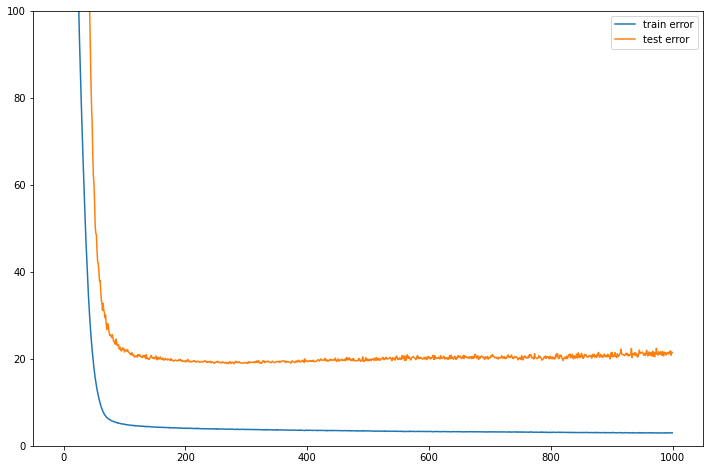

In [63]:
plt.figure(figsize = (12,8))
plt.plot(hist['loss'], label = 'train error')
plt.plot(hist['val_loss'], label = 'test error')
plt.legend()
plt.ylim([0,100])

In [13]:
df['USA']=(origin==1)*1.0
df['Europe']=(origin==2)*1.0
df['Japan']=(origin==3)*1.0

## 다른방법

In [14]:
df=pd.read_csv('auto.csv')
df=pd.get_dummies(df, columns=['origin'], prefix='origin',)
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,18.0,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1,0,0


## Input/Output(Label) 나누기

In [15]:
from sklearn.model_selection import train_test_split
y = df.pop('mpg')
X = df

In [16]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2)

## 데이터 정규화

In [18]:
mean = train_X.mean()
std = train_X.std()
train_X_std = (train_X - mean)/std
test_X_std = (test_X - mean)/std

## 회귀모형 만들기

In [19]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu',input_shape=[len(train_X_std.columns)]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse'])
    return model

In [20]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.predict(train_X_std[:10])

1/1 [==============================] - 0s 323ms/step


array([[-0.08869299],
       [ 0.10913596],
       [ 0.14509092],
       [ 0.08899818],
       [-0.19442564],
       [ 0.09516504],
       [ 0.18004435],
       [-0.1432656 ],
       [-0.25822526],
       [-0.14377517]], dtype=float32)

## 모델 확인하기

In [22]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
    print('.', end='')
# history = model.fit(train_X, train_y, epochs=1000, )
model = build_model()
history = model.fit(train_X_std, train_y, epochs=1000, validation_split = 0.2, verbose = 0, callbacks=[PrintDot()])

.











## 모델 성능 플로팅하기

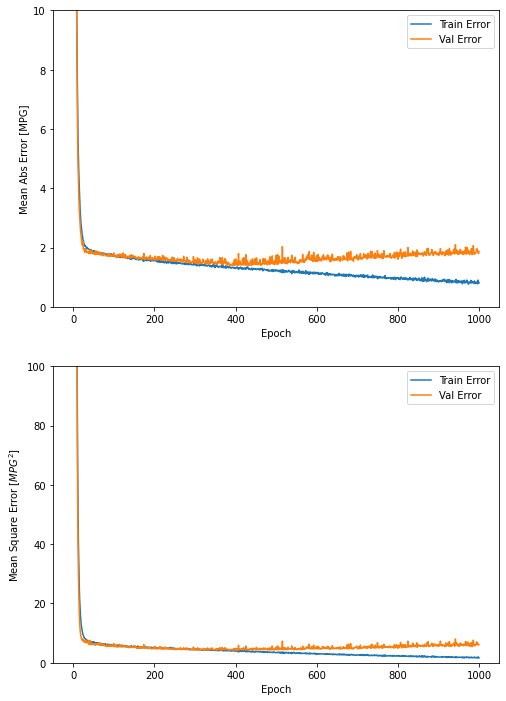

In [23]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()

plot_history(history)

In [24]:
train_X_std

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,1.471371,1.056866,0.634315,0.614339,-1.270212,-1.580609,0.750463,-0.455882,-0.481187
144,-0.860472,-0.994205,-0.751086,-0.990487,-0.377905,-0.518385,0.750463,-0.455882,-0.481187
348,-0.860472,-0.918590,-1.002977,-0.693728,1.835016,1.340506,0.750463,-0.455882,-0.481187
312,-0.860472,-0.521608,-0.423628,-0.123485,0.907017,1.074950,0.750463,-0.455882,-0.481187
315,-0.860472,-0.928042,-0.675519,-0.917170,0.086095,1.074950,-1.328253,2.186544,-0.481187
...,...,...,...,...,...,...,...,...,...
369,-0.860472,-0.852426,-0.776275,-1.159232,-0.092367,1.606062,-1.328253,2.186544,-0.481187
65,1.471371,1.028510,1.138097,0.809851,-1.448673,-1.049497,0.750463,-0.455882,-0.481187
2,1.471371,1.160837,1.138097,0.535204,-1.627134,-1.580609,0.750463,-0.455882,-0.481187
293,-0.860472,-0.918590,-0.625141,-1.234877,-0.413597,0.809394,0.750463,-0.455882,-0.481187


## Early Stopping 확인

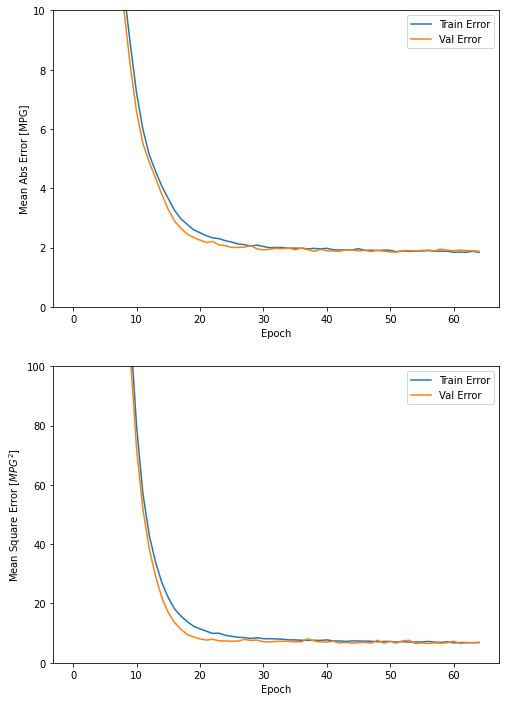

In [25]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_X_std, train_y, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

## Prediction on Testing Data

In [26]:
y_pred=model.predict(test_X_std)
y_pred=y_pred.flatten()

3/3 [==============================] - 0s 4ms/step


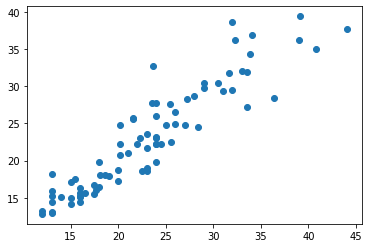

In [27]:
plt.scatter(test_y, y_pred)

(array([ 1.,  1.,  5.,  6., 18., 23., 15.,  6.,  2.,  2.]),
 array([-8.98037796, -7.28053329, -5.58068863, -3.88084396, -2.1809993 ,
        -0.48115463,  1.21869003,  2.9185347 ,  4.61837936,  6.31822403,
         8.0180687 ]),
 <a list of 10 Patch objects>)

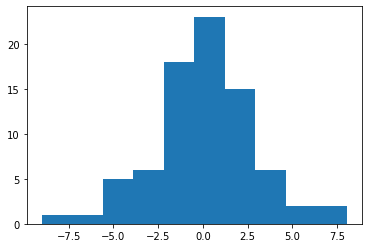

In [28]:
plt.hist(test_y-y_pred)

## Standardize 하지 않고 학습
## 모델을 